<a href="https://colab.research.google.com/github/Ousoka/prix_voiture_audi_dl/blob/master/Car_Price_ASB_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import data

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/Ousoka/prix_voiture_audi_dl/master/prix_voiture_audi.xls"
df = pd.read_excel(url)


In [6]:
print(df.head())

  model  annee   prix transmission  miles carburant  taxe  distance  moteur
0    A1   2017  12500       Manual  15735    Petrol   150      55.4     1.4
1    A6   2016  16500    Automatic  36203    Diesel    20      64.2     2.0
2    A1   2016  11000       Manual  29946    Petrol    30      55.4     1.4
3    A4   2017  16800    Automatic  25952    Diesel   145      67.3     2.0
4    A3   2019  17300       Manual   1998    Petrol   145      49.6     1.0


In [7]:
# df = pd.read_csv(path + '/ObesityDataSet_raw_and_data_sinthetic.csv')

In [8]:
df.head()

,model,annee,prix,transmission,miles,carburant,taxe,distance,moteur
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [9]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   annee         10668 non-null  int64  
 2   prix          10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   miles         10668 non-null  int64  
 5   carburant     10668 non-null  object 
 6   taxe          10668 non-null  int64  
 7   distance      10668 non-null  float64
 8   moteur        10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4 MB


In [10]:
df.duplicated().sum()

np.int64(103)

In [11]:
df_cleaned = df.drop_duplicates()

In [12]:
df_cleaned.duplicated().sum()

np.int64(0)

In [13]:
df_cleaned.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10565 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  object 
 1   annee         10565 non-null  int64  
 2   prix          10565 non-null  int64  
 3   transmission  10565 non-null  object 
 4   miles         10565 non-null  int64  
 5   carburant     10565 non-null  object 
 6   taxe          10565 non-null  int64  
 7   distance      10565 non-null  float64
 8   moteur        10565 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.5 MB


In [14]:
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns
print("Colonnes numériques :")
print(colonnes_numeriques.tolist())

Colonnes numériques :
['annee', 'prix', 'miles', 'taxe', 'distance', 'moteur']


In [15]:
colonnes_categorielles = df.select_dtypes(include=['object', 'category']).columns
print("\nColonnes catégorielles :")
print(colonnes_categorielles.tolist())


Colonnes catégorielles :
['model', 'transmission', 'carburant']


In [16]:
####### Selection des variables numeriques par le type, version interactive


import plotly.express as px
import pandas as pd

# # Identifier les colonnes numériques (en excluant 'prix')
# vars_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.drop('prix')

# Générer un scatter plot interactif pour chaque variable numérique
for col in colonnes_numeriques:
  if col == 'prix':
    continue
  fig = px.scatter(
      df,
      x=col,
      y='prix',
      title=f"Prix en fonction de {col}",
      labels={col: col, 'prix': 'Prix'},
      opacity=0.6,
      template="plotly_white"
  )
  fig.show()

**Pourcentage de vente de vehicule par modele**

In [17]:
# Compter les véhicules par modèle
vente_par_modele = df['model'].value_counts(normalize=True) * 100

# Convertir en DataFrame pour affichage clair
vente_par_modele_df = vente_par_modele.reset_index()
vente_par_modele_df.columns = ['model', 'pourcentage']

# Afficher les premiers résultats
print(vente_par_modele_df)


   model  pourcentage
0     A3    18.082115
1     Q3    13.282715
2     A4    12.945257
3     A1    12.626547
4     A5     8.267717
5     Q5     8.220847
6     Q2     7.705287
7     A6     7.011624
8     Q7     3.721410
9     TT     3.149606
10    A7     1.143607
11    A8     1.106112
12    Q8     0.646794
13   RS6     0.365579
14   RS3     0.309336
15   RS4     0.290589
16   RS5     0.271841
17    R8     0.262467
18    S3     0.168729
19   SQ5     0.149981
20    S4     0.112486
21   SQ7     0.074991
22    S8     0.037495
23    S5     0.028121
24    A2     0.009374
25   RS7     0.009374


In [18]:
import plotly.express as px

fig = px.bar(
    vente_par_modele_df,  # top 10 modèles les plus vendus
    x='model',
    y='pourcentage',
    title="Top 10 des modèles les plus vendus (%)",
    labels={'model': 'Modèle', 'pourcentage': 'Pourcentage de vente'},
    text_auto='.2f',
    template="plotly_white"
)
fig.update_traces(textposition='outside')
fig.show()


**Quels sont les modeles qui representent plus de 80% des ventes?**

In [19]:
# 1. Compter et normaliser
vente_par_modele = df['model'].value_counts(normalize=True) * 100

# 2. En DataFrame
vente_df = vente_par_modele.reset_index()
vente_df.columns = ['model', 'pourcentage']

# 3. Pourcentage cumulé
vente_df['pourcentage_cumule'] = vente_df['pourcentage'].cumsum()

# 4. Trouver l’indice où on atteint ou dépasse 80%
indice_limite = vente_df[vente_df['pourcentage_cumule'] >= 80].index[0]

# 5. Garder tous les modèles jusqu’à cet indice (inclus)
top_80 = vente_df.loc[:indice_limite]

# 6. Afficher les résultats
print(top_80)


  model  pourcentage  pourcentage_cumule
0    A3    18.082115           18.082115
1    Q3    13.282715           31.364829
2    A4    12.945257           44.310086
3    A1    12.626547           56.936633
4    A5     8.267717           65.204349
5    Q5     8.220847           73.425197
6    Q2     7.705287           81.130484


In [20]:
import plotly.express as px

fig = px.bar(
    top_80,
    x='model',
    y='pourcentage',
    title='Modèles représentant les 80% des ventes',
    labels={'model': 'Modèle', 'pourcentage': 'Pourcentage'},
    text_auto='.2f',
    template="plotly_white"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# Barres pour le pourcentage individuel
fig.add_trace(go.Bar(
    x=vente_df['model'],
    y=vente_df['pourcentage'],
    name='Pourcentage par modèle',
    marker_color='lightskyblue'
))

# Ligne pour le pourcentage cumulé
fig.add_trace(go.Scatter(
    x=vente_df['model'],
    y=vente_df['pourcentage_cumule'],
    name='Pourcentage cumulé',
    mode='lines+markers',
    line=dict(color='firebrick', width=2)
))

# Ajouter ligne horizontale à 80%
fig.add_shape(
    type='line',
    x0=-0.5, x1=len(vente_df)-0.5,
    y0=80, y1=80,
    line=dict(dash='dash', color='green'),
)

fig.update_layout(
    title='Courbe de Pareto des modèles',
    xaxis_title='Modèle',
    yaxis_title='Pourcentage',
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()


**Le modele le pluscher et son prix**

In [22]:
df.loc[df['prix'].idxmax()]

,4783
model,R8
annee,2020
prix,145000
transmission,Semi-Auto
miles,2000
carburant,Petrol
taxe,145
distance,21.1
moteur,5.2


**Implementer le target-encoding à la variable model**

In [23]:
# Calcul de la moyenne du prix par modèle
target_mean = df.groupby('model')['prix'].mean()

# Mapping dans une nouvelle colonne
df['model_encoded'] = df['model'].map(target_mean)


In [24]:
print(df[['model', 'prix', 'model_encoded']].head())

  model   prix  model_encoded
0    A1  12500   14327.750557
1    A6  16500   22695.385027
2    A1  11000   14327.750557
3    A4  16800   20255.450398
4    A3  17300   17408.522032


In [25]:
# Inverser le dictionnaire {model -> mean_price}
inverse_mapping = {v: k for k, v in target_mean.items()}

# Créer une colonne avec le nom du modèle à partir de model_encoded
df['model_decoded'] = df['model_encoded'].map(inverse_mapping)


In [26]:
print(df[['model_encoded', 'model_decoded']].drop_duplicates().head())


    model_encoded model_decoded
0    14327.750557            A1
1    22695.385027            A6
3    20255.450398            A4
4    17408.522032            A3
12   22999.261821            Q3


**Implementer le label-encoder sur la variable model**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Créer l'encodeur
le = LabelEncoder()

# Appliquer le label encoding
df['model_label'] = le.fit_transform(df['model'])


In [28]:
# Créer un DataFrame de correspondance
label_mapping = pd.DataFrame({
    'model': le.classes_,
    'model_label': range(len(le.classes_))
})
print(label_mapping)


   model  model_label
0     A1            0
1     A2            1
2     A3            2
3     A4            3
4     A5            4
5     A6            5
6     A7            6
7     A8            7
8     Q2            8
9     Q3            9
10    Q5           10
11    Q7           11
12    Q8           12
13    R8           13
14   RS3           14
15   RS4           15
16   RS5           16
17   RS6           17
18   RS7           18
19    S3           19
20    S4           20
21    S5           21
22    S8           22
23   SQ5           23
24   SQ7           24
25    TT           25


**Implementation du laber encoder pour la variable transmission**

In [29]:
from sklearn.preprocessing import LabelEncoder

# Créer un nouvel encodeur pour 'transmission'
le_transmission = LabelEncoder()

# Appliquer l'encodage
df['transmission_label'] = le_transmission.fit_transform(df['transmission'])


In [30]:
# Afficher le mapping transmission ↔ label
trans_mapping = pd.DataFrame({
    'transmission': le_transmission.classes_,
    'transmission_label': range(len(le_transmission.classes_))
})
print(trans_mapping)


  transmission  transmission_label
0    Automatic                   0
1       Manual                   1
2    Semi-Auto                   2


**Implementation du laber encoder pour la variable carburant**

In [31]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur pour la colonne 'carburant'
le_carburant = LabelEncoder()

# Appliquer l'encodage sur la colonne 'carburant'
df['carburant_label'] = le_carburant.fit_transform(df['carburant'])


In [32]:
# Afficher le mapping original ↔ encodé
carburant_mapping = pd.DataFrame({
    'carburant': le_carburant.classes_,
    'carburant_label': range(len(le_carburant.classes_))
})
print(carburant_mapping)


  carburant  carburant_label
0    Diesel                0
1    Hybrid                1
2    Petrol                2


In [33]:
from sklearn.model_selection import train_test_split

df1 = df.drop(columns=['model', 'transmission', 'carburant','model_decoded','model_encoded',])
# 1. Séparer X et y
X = df1.drop(columns=['prix'])  # Variables d'entrée
y = df1['prix']                 # Variable cible

# 2. Séparer en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # pour reproductibilité
)


In [34]:
print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test  :", y_test.shape)


Taille X_train : (8534, 8)
Taille X_test  : (2134, 8)
Taille y_train : (8534,)
Taille y_test  : (2134,)


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annee               10668 non-null  int64  
 1   prix                10668 non-null  int64  
 2   miles               10668 non-null  int64  
 3   taxe                10668 non-null  int64  
 4   distance            10668 non-null  float64
 5   moteur              10668 non-null  float64
 6   model_label         10668 non-null  int64  
 7   transmission_label  10668 non-null  int64  
 8   carburant_label     10668 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 750.2 KB


In [36]:
correlation_matrix = df1.corr(numeric_only=True)
print(correlation_matrix)


                       annee      prix     miles      taxe  distance  \
annee               1.000000  0.592581 -0.789667  0.093066 -0.351281   
prix                0.592581  1.000000 -0.535357  0.356157 -0.600334   
miles              -0.789667 -0.535357  1.000000 -0.166547  0.395103   
taxe                0.093066  0.356157 -0.166547  1.000000 -0.635909   
distance           -0.351281 -0.600334  0.395103 -0.635909  1.000000   
moteur             -0.031582  0.591262  0.070710  0.393075 -0.365621   
model_label         0.056775  0.394635 -0.068694  0.393301 -0.408770   
transmission_label  0.049203  0.009864 -0.042341 -0.000919 -0.014149   
carburant_label     0.122428 -0.032135 -0.240984  0.101257 -0.301099   

                      moteur  model_label  transmission_label  carburant_label  
annee              -0.031582     0.056775            0.049203         0.122428  
prix                0.591262     0.394635            0.009864        -0.032135  
miles               0.070710    -0.0

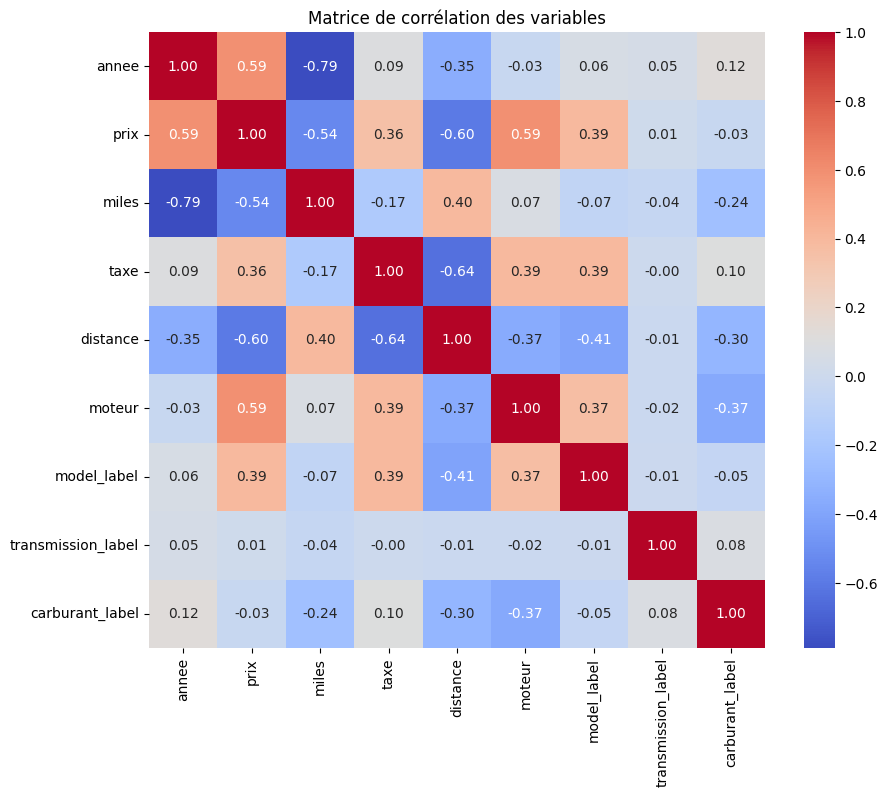

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables")
plt.show()


In [38]:
# Corrélation entre 'prix' et toutes les autres colonnes
correlation_prix = df1.corr(numeric_only=True)['prix'].drop('prix')

# Affichage
print(correlation_prix)


annee                 0.592581
miles                -0.535357
taxe                  0.356157
distance             -0.600334
moteur                0.591262
model_label           0.394635
transmission_label    0.009864
carburant_label      -0.032135
Name: prix, dtype: float64


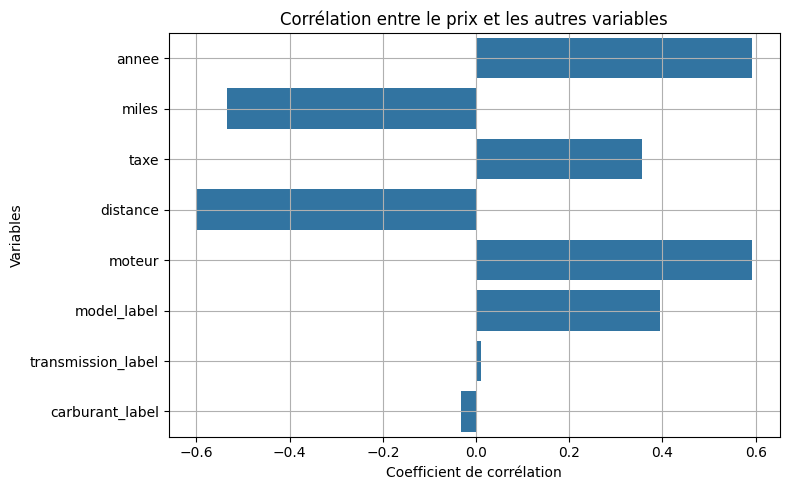

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_prix.values, y=correlation_prix.index)
plt.title("Corrélation entre le prix et les autres variables")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
from scipy.stats import pearsonr

# Sélection des colonnes numériques sauf 'prix'
variables = df1.drop(columns='prix').columns

# Dictionnaire pour stocker les p-values
p_values = {}

# Calcul de la p-value entre 'prix' et chaque variable
for var in variables:
    _, p = pearsonr(df['prix'], df[var])
    p_values[var] = p

# Affichage trié
p_values_sorted = dict(sorted(p_values.items(), key=lambda item: item[1]))
for var, p in p_values_sorted.items():
    print(f"{var}: p-value = {p:.4f}")


annee: p-value = 0.0000
miles: p-value = 0.0000
distance: p-value = 0.0000
moteur: p-value = 0.0000
model_label: p-value = 0.0000
taxe: p-value = 0.0000
carburant_label: p-value = 0.0009
transmission_label: p-value = 0.3083


In [41]:
X_train = X_train.drop(columns=['transmission_label'])
X_test = X_test.drop(columns=['transmission_label'])
print("Colonnes de X_train :", X_train.columns.tolist())

Colonnes de X_train : ['annee', 'miles', 'taxe', 'distance', 'moteur', 'model_label', 'carburant_label']


In [42]:
from sklearn.preprocessing import StandardScaler

# Créer un scaler
scaler = StandardScaler()

# Ajuster sur les données d'entraînement et transformer
X_train_scaled = scaler.fit_transform(X_train)

# Utiliser la même transformation sur les données de test
X_test_scaled = scaler.transform(X_test)


**Verifier que les variables d'entrainement et de test sont dans le meme ordre**

In [43]:
# print("Colonnes de X_train_scaled :", X_train_scaled.columns.tolist())
# print("Colonnes de X_test_scaled :", X_test_scaled.columns.tolist())

**Ou bien les convertir en dataframe**

In [44]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [45]:
print((X_train_scaled.columns == X_test_scaled.columns).all())

True


Calculer le R2 score pour chacun des 4 modeles

Linear Regression

Decision Tree Regressor

XGBoost

KNN

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Dictionnaire des modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Arbre de Décision": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, verbosity=0),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Stockage des résultats
results = []

# Boucle sur les modèles
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Modèle": name,
        "RMSE": round(rmse, 2),
        "R²": round(r2, 4)
    })

# Affichage des résultats dans un DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)


                Modèle     RMSE      R²
2              XGBoost  2308.20  0.9647
3                  KNN  2730.60  0.9507
1    Arbre de Décision  3125.57  0.9354
0  Régression Linéaire  5539.81  0.7969


In [48]:
xgb_model = models["XGBoost"]

# Récupérer l'importance des features (après .fit())
importances = xgb_model.feature_importances_

# Associer aux noms des colonnes
features = pd.Series((importances/importances.sum())*100, index=X_train_scaled.columns)

# Trier par importance décroissante
top_features = features.sort_values(ascending=False).head(5).round(2)


# Affichage
print("Selon XGBoost, voici le top 5 des variables les plus importantes :\n")
print(top_features)


Selon XGBoost, voici le top 5 des variables les plus importantes :

moteur             30.820000
distance           23.600000
annee              22.139999
model_label         8.740000
carburant_label     7.550000
dtype: float32


Stacking

In [49]:
# Do stacking using XGB (Regressor) and GB (Regressor)
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Définir les modèles de base
base_learners = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=100, verbosity=0)),
    ('gbr', GradientBoostingRegressor(random_state=42, n_estimators=100))
]

# Modèle final (meta-estimator)
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=False  # Si tu veux concaténer X d'origine aux prédictions intermédiaires, mets True
)

# Entraînement
stacking_model.fit(X_train_scaled, y_train)

# Prédiction
y_stack_pred = stacking_model.predict(X_test_scaled)

# Évaluation
r2_stack = r2_score(y_test, y_stack_pred)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_stack_pred))

# Affichage
print(f"Stacking (XGBoost + GradientBoost -> Ridge)")
print(f"R²   : {r2_stack:.4f}")
print(f"RMSE : {rmse_stack:.2f}")

Stacking (XGBoost + GradientBoost -> Ridge)
R²   : 0.9651
RMSE : 2295.86


In [50]:
# Do stacking using XGB (Regressor) and GB (Regressor)
# Faire du stacking entre XGBRegressor et GradienBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [
    ('xgb', xgb_model),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)
r2_stacking = r2_score(y_test, y_pred_stacking)
print(f"Stacking R-squared score: {r2_stacking}")


Stacking R-squared score: 0.9651229278747665


Courbe d'apprentissage du R2 Score pour train et test

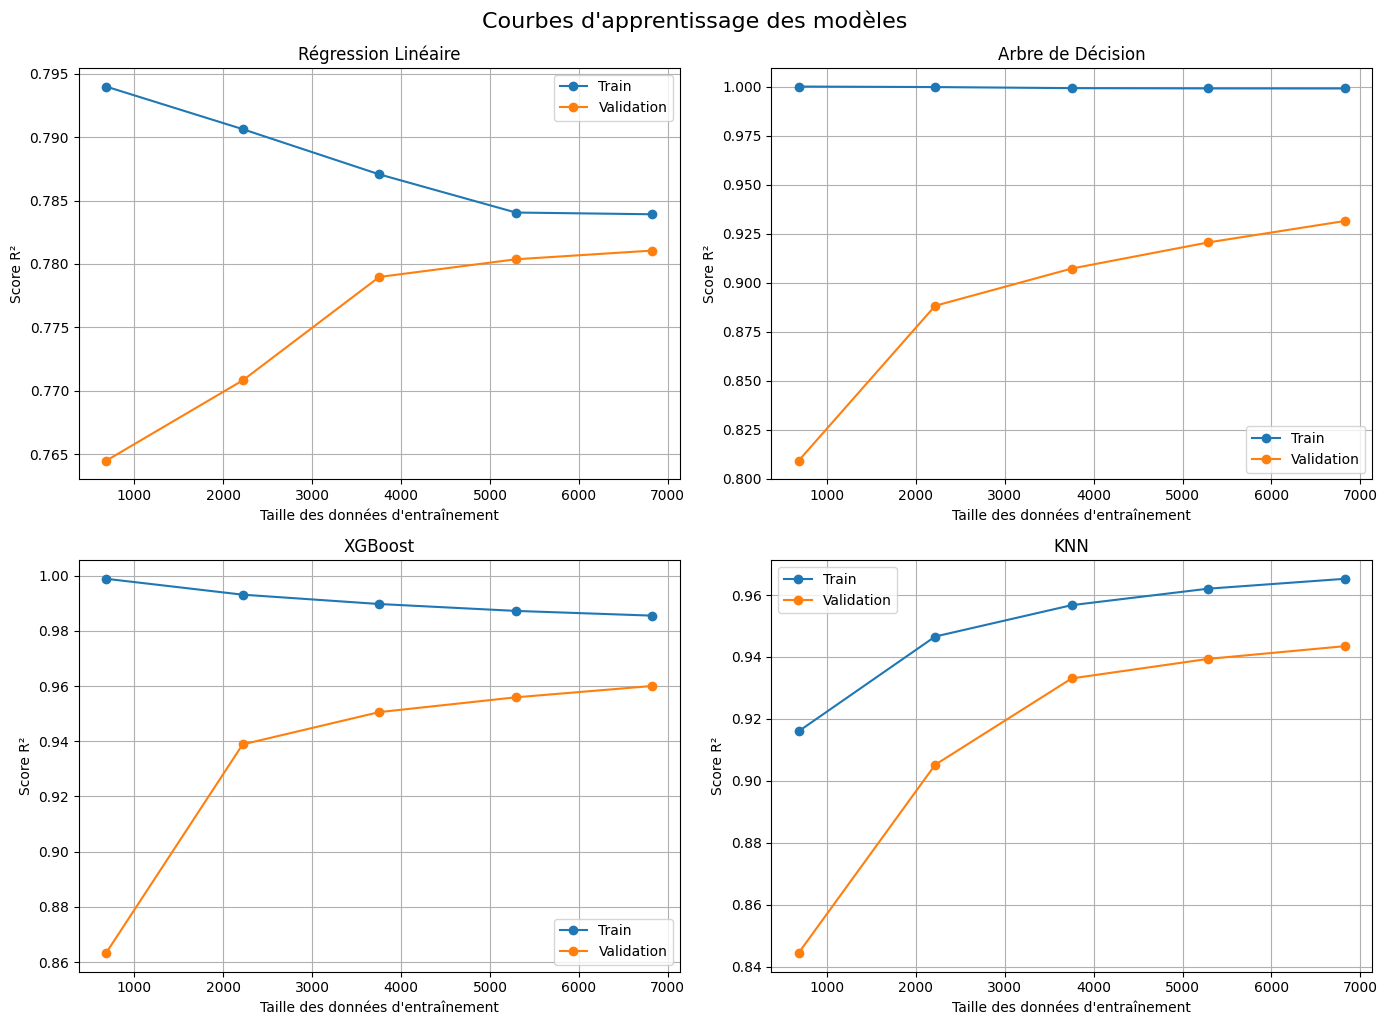

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Utiliser les mêmes modèles que précédemment
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    "Régression Linéaire": LinearRegression(),
    "Arbre de Décision": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, verbosity=0),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

plt.figure(figsize=(14, 10))

# Afficher une courbe par modèle
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)

    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train_scaled,
        y_train,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=5,
        n_jobs=-1
    )

    # Moyennes et écarts-types
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Courbes
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Train')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation')

    plt.title(name)
    plt.xlabel("Taille des données d'entraînement")
    plt.ylabel("Score R²")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Courbes d'apprentissage des modèles", fontsize=16, y=1.02)
plt.show()


RMSE : Root Mean Squared Error (Ypred, Ytest)

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Modèles (déjà entraînés ou à entraîner ici)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# Recréer les modèles (ou les récupérer s’ils existent déjà)
models = {
    "Régression Linéaire": LinearRegression(),
    "Arbre de Décision": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, verbosity=0),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Liste pour stocker les résultats
results = []

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Modèle": name,
        "RMSE": round(rmse, 2)
    })

# Affichage final
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("Comparaison des modèles (RMSE uniquement) :\n")
print(results_df)


Comparaison des modèles (RMSE uniquement) :

                Modèle     RMSE
2              XGBoost  2308.20
3                  KNN  2730.60
1    Arbre de Décision  3125.57
0  Régression Linéaire  5539.81
